In [38]:
#Import Libraries


import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates

from datetime import datetime

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
#Read xls File and Load to a dataframe

df = pd.read_excel('weather2015_2019(1).xlsx')
#print(df)
df = df.drop(columns = df.columns[13:])
df = df.drop(columns = df.columns[0:2])
df = df.dropna()
df

,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
0,Clapp-Library,2015-01-01,00:00:00,1024.1,-8.777778,68.0,-13.611111,0.0,0.00000,157.5,1.78816
1,Clapp-Library,2015-01-01,00:30:00,1028.0,-6.555556,49.0,-15.500000,0.0,2.23520,270.0,8.04672
2,Clapp-Library,2015-01-01,01:00:00,1028.2,-6.833333,50.0,-15.555556,0.0,1.78816,247.5,6.25856
3,Clapp-Library,2015-01-01,01:30:00,1029.3,-7.222222,52.0,-15.444444,0.0,3.12928,225.0,6.70560
4,Clapp-Library,2015-01-01,02:00:00,1029.5,-7.000000,53.0,-15.000000,0.0,4.02336,225.0,7.59968
...,...,...,...,...,...,...,...,...,...,...,...
97031,Clapp-Library,2020-07-13,08:30:00,1011.1,23.222222,84.0,20.388889,0.0,0.44704,135.0,1.78816
97032,Clapp-Library,2020-07-13,09:00:00,1011.0,24.611111,76.0,20.111111,0.0,0.00000,135.0,1.34112
97033,Clapp-Library,2020-07-13,09:30:00,1011.1,24.888889,74.0,19.944444,0.0,0.44704,135.0,2.23520
97034,Clapp-Library,2020-07-13,10:00:00,1011.0,26.444444,70.0,20.555556,0.0,0.00000,202.5,1.34112


In [40]:
#cooerce time stamps to str
df['Time'] = df['Time'].astype(str)
#df["Date"] = pd.to_datetime(df["Date"]).dt.date
#df['Barometric Pressure (mbar)'] = df['Barometric Pressure (mbar)'].astype(str)
df.describe()

,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
count,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000,84860.000000
mean,1020.288802,10.018659,69.048727,4.092463,0.052497,2.326678,207.855350,5.782999
std,8.501196,10.533485,18.276788,11.026103,0.364100,1.852109,104.181948,3.705477
min,975.600000,-24.555556,13.000000,-32.055556,0.000000,0.000000,0.000000,0.447040
25%,1015.000000,1.777778,55.000000,-4.111111,0.000000,0.894080,157.500000,2.682240
50%,1020.100000,9.722222,70.000000,4.055556,0.000000,1.788160,202.500000,5.364480
75%,1025.700000,18.944444,85.000000,13.444444,0.000000,3.576320,292.500000,8.046720
max,1049.200000,35.888889,100.000000,27.000000,18.034000,12.517120,337.500000,28.163520


In [41]:
#Separate years
#df2014 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2015 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2015-03-01", "2015-04-30")])]
df2016 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2016-03-01", "2016-04-30")])]
df2017 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2017-03-01", "2017-04-30")])]
df2018 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2018-03-01", "2018-04-30")])]
df2019 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2019-03-01", "2019-04-30")])]
df2020 = df[df["Date"].isin([d.strftime("%Y-%m-%d") for d in pd.date_range("2020-03-01", "2020-04-30")])]
df2015_2019 = pd.concat([df2015,df2016,df2017,df2018])
df2015_2019

,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
2832,Clapp-Library,2015-03-01,00:00:00,1036.0,-10.388889,42.0,-20.888889,0.0,0.00000,315.0,1.34112
2833,Clapp-Library,2015-03-01,00:30:00,1035.9,-10.388889,45.0,-20.055556,0.0,0.00000,315.0,1.34112
2837,Clapp-Library,2015-03-01,02:30:00,1034.9,-12.055556,57.0,-18.833333,0.0,0.00000,315.0,1.34112
2838,Clapp-Library,2015-03-01,03:00:00,1035.0,-12.111111,60.0,-18.277778,0.0,0.44704,315.0,1.78816
2839,Clapp-Library,2015-03-01,03:30:00,1034.9,-12.777778,63.0,-18.388889,0.0,0.89408,315.0,2.68224
...,...,...,...,...,...,...,...,...,...,...,...
58414,Clapp-Library,2018-04-30,21:30:00,1019.1,7.833333,76.0,3.888889,0.0,2.68224,292.5,6.25856
58415,Clapp-Library,2018-04-30,22:00:00,1019.2,7.666667,77.0,3.888889,0.0,2.23520,292.5,6.25856
58416,Clapp-Library,2018-04-30,22:30:00,1019.1,7.388889,78.0,3.777778,0.0,1.78816,292.5,4.91744
58417,Clapp-Library,2018-04-30,23:00:00,1019.2,7.166667,79.0,3.777778,0.0,0.89408,292.5,3.57632


/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_17231/577814791.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2015_2019['Barometric Pressure (mbar)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_17231/577814791.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

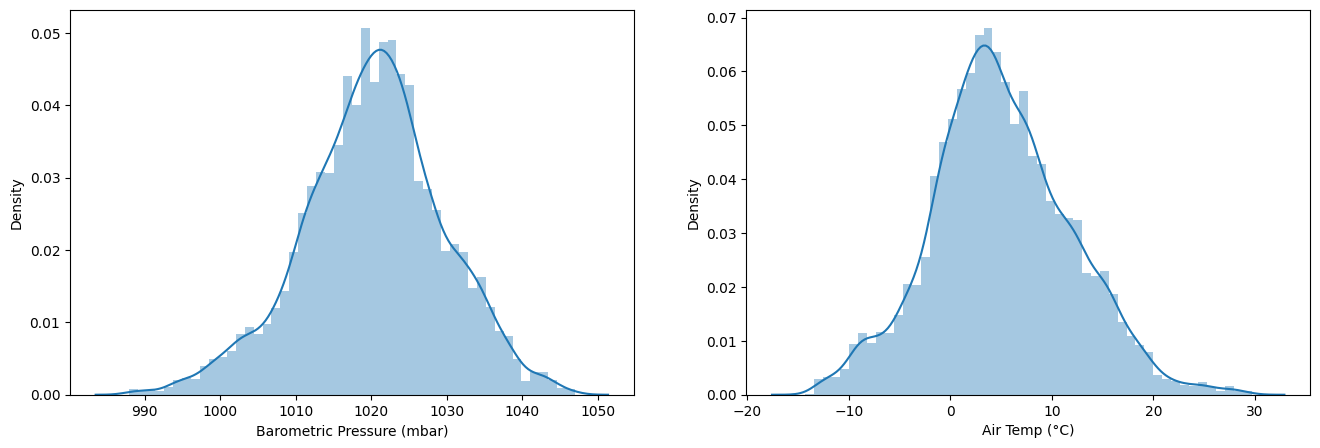

In [42]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2015_2019['Barometric Pressure (mbar)'])
plt.subplot(1,2,2)
sns.distplot(df2015_2019['Air Temp (°C)'])
plt.show()

<Axes: >

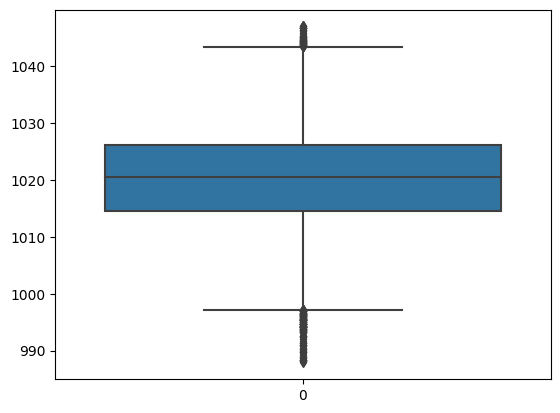

In [43]:
sns.boxplot(df2015_2019['Barometric Pressure (mbar)'].values)

<Axes: >

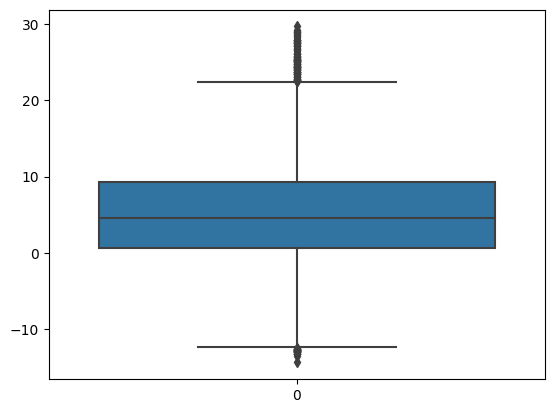

In [44]:
sns.boxplot(df2015_2019['Air Temp (°C)'].values)

### Delet Outlier for Air Temp (°C)

In [45]:
#Finding the IQR
percentile25 = df2015_2019['Air Temp (°C)'].quantile(0.25)
percentile75 = df2015_2019['Air Temp (°C)'].quantile(0.75)

In [46]:
#Finding the upper and lower limits
IQR = percentile75 -percentile25
upper_limit = percentile75 + (1.5 * IQR)
lower_limit = percentile25 - (1.5 * IQR)

In [47]:
#Step-7: Finding outliers
df2015_2019[df2015_2019['Air Temp (°C)'] > upper_limit]
df2015_2019[df2015_2019['Air Temp (°C)'] < lower_limit]

,Station,Date,Time,Barometric Pressure (mbar),Air Temp (°C),RH (%),Dew Point (°C),Rain (mm),Wind Speed (m/s),Wind Direction (ø),Gust Speed (m/s)
2839,Clapp-Library,2015-03-01,03:30:00,1034.9,-12.777778,63.0,-18.388889,0.0,0.89408,315.0,2.68224
2984,Clapp-Library,2015-03-04,04:00:00,1032.2,-13.444444,55.0,-20.555556,0.0,1.78816,315.0,4.02336
2985,Clapp-Library,2015-03-04,04:30:00,1032.3,-13.277778,54.0,-20.611111,0.0,0.00000,315.0,1.34112
2991,Clapp-Library,2015-03-04,07:30:00,1034.2,-14.333333,61.0,-20.222222,0.0,0.00000,292.5,1.78816
3084,Clapp-Library,2015-03-06,06:00:00,1041.2,-12.555556,42.0,-22.833333,0.0,5.36448,315.0,9.83488
3085,Clapp-Library,2015-03-06,06:30:00,1041.7,-12.777778,41.0,-23.333333,0.0,4.47040,337.5,9.83488
3086,Clapp-Library,2015-03-06,07:00:00,1041.6,-12.777778,40.0,-23.611111,0.0,4.47040,337.5,9.83488
3087,Clapp-Library,2015-03-06,07:30:00,1042.0,-12.666667,39.0,-23.777778,0.0,5.36448,337.5,10.28192
38113,Clapp-Library,2017-03-05,00:30:00,1039.1,-12.611111,39.0,-23.722222,0.0,5.81152,315.0,13.41120
38114,Clapp-Library,2017-03-05,01:00:00,1039.3,-12.833333,39.0,-23.944444,0.0,4.47040,337.5,9.38784


In [48]:
#Step-8: Trimming outliers
new_df_2015_2019 = df2015_2019[ df2015_2019['Air Temp (°C)']>lower_limit]
new_df_2015_2019 = new_df_2015_2019[new_df_2015_2019['Air Temp (°C)']<upper_limit]
new_df_2015_2019.shape

(10732, 11)

/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_17231/718597567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2015_2019['Air Temp (°C)'])
/var/folders/2r/4zcvy2mx5454t4_ny06j3blc0000gn/T/ipykernel_17231/718597567.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_2015_

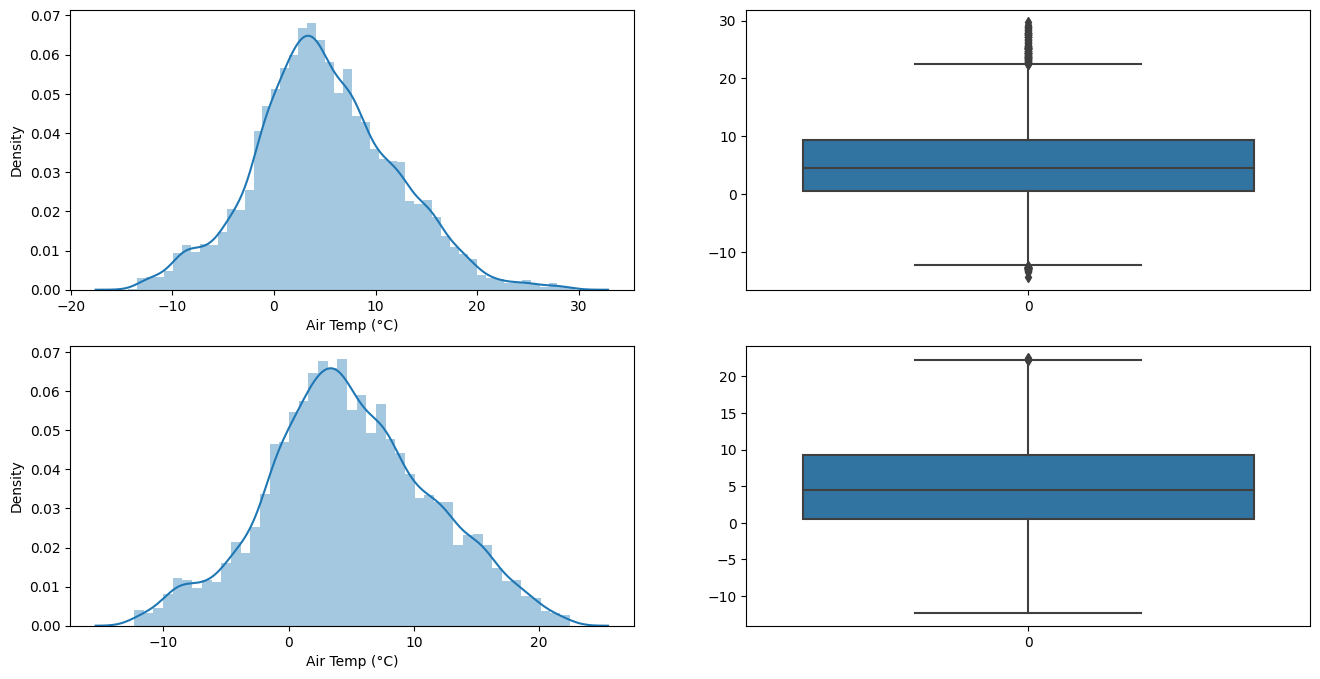

In [49]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df2015_2019['Air Temp (°C)'])
plt.subplot(2,2,2)
sns.boxplot(df2015_2019['Air Temp (°C)'].values)
plt.subplot(2,2,3)
sns.distplot(new_df_2015_2019['Air Temp (°C)'])
plt.subplot(2,2,4)
sns.boxplot(new_df_2015_2019['Air Temp (°C)'].values)
plt.show()

### Case 2-'Barometric Pressure (mbar)'

0.006037211170592416
41.76645849052015


Text(0, 0.5, 'Air Temp (°C)')

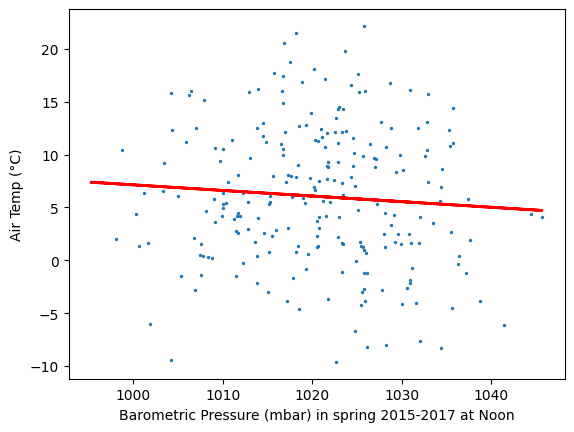

In [50]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_17_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

pre15_17 = df15_17_noon['Barometric Pressure (mbar)']
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,1)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


plt.scatter(pre15_17,temp15_17_noon, s=2)
plt.plot(pre15_17, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

0.0246601000201484
36.00010018545179


(array([ 990., 1000., 1010., 1020., 1030., 1040., 1050.]),
 [Text(990.0, 0, '990'),
  Text(1000.0, 0, '1000'),
  Text(1010.0, 0, '1010'),
  Text(1020.0, 0, '1020'),
  Text(1030.0, 0, '1030'),
  Text(1040.0, 0, '1040'),
  Text(1050.0, 0, '1050')])

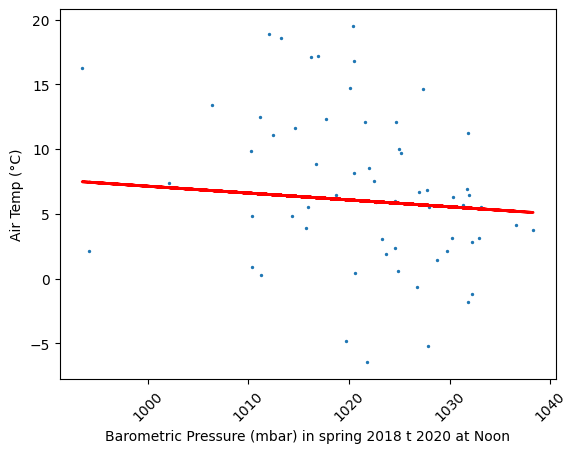

In [51]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019,df2020,df2018])
df2020_noon = df2019[df2019["Time"]== '12:00:00']
pre2020_noon = df2020_noon['Barometric Pressure (mbar)']
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(pre2020_noon, temp2020_noon, s = 2)
plt.plot(pre2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Barometric Pressure (mbar) in spring 2018 t 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)


### Case 1: Date

0.06196425643752901
39.41639605267988


Text(0, 0.5, 'Air Temp (°C)')

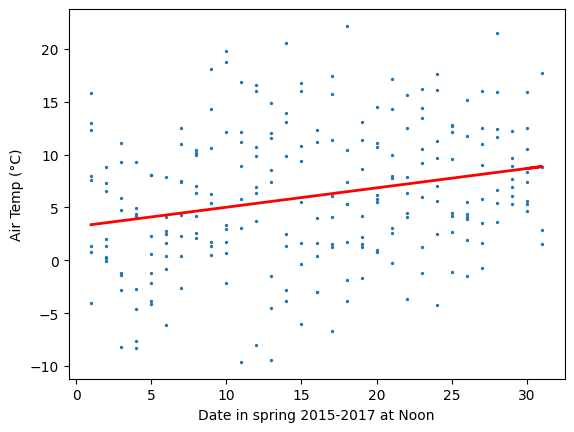

In [52]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

date15_19_noon = df15_19_noon['Date']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

date15_19_noon = date15_19_noon.astype(str)
date15_19_noon = date15_19_noon.str.split("-").str[-1].astype(int)

# convert to 2-D array
date15_19_noon = date15_19_noon.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(date15_19_noon,temp15_17_noon)
temp15_19_noon_pred = model.predict(date15_19_noon)
#list to store number of predictor variables
predictors=[]

#list to store model scores
MSE_scores=[]
R2_scores=[]

MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

predictors.append(1)
MSE_scores.append(MSE)
R2_scores.append(R2)
plt.scatter(date15_19_noon,temp15_17_noon, s=2)
plt.plot(date15_19_noon, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Date in spring 2015-2017 at Noon")
plt.ylabel("Air Temp (°C)")

0.12649144009188895
32.241473634157


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

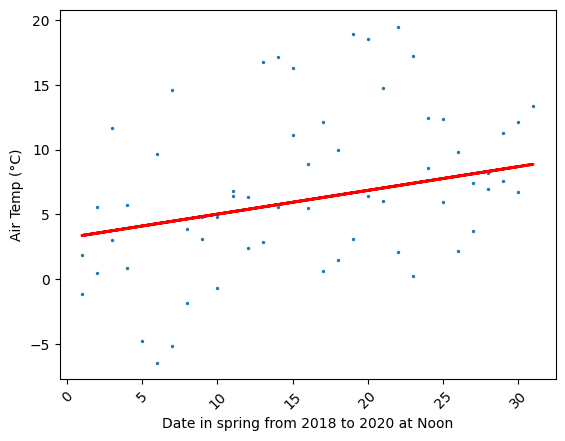

In [53]:
##Plot dates by temps for 2020
#df20_19 =pd.concat([df2019,df2020,df2018])
df2020_noon = df2019[df2019["Time"]== '12:00:00']

date2020_noon = df2020_noon['Date']
temp2020_noon = df2020_noon['Air Temp (°C)']

date2020_noon = date2020_noon.astype(str)
date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)

date2020_noon = date2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(date2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(date2020_noon, temp2020_noon, s = 2)
plt.plot(date2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Date in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 3- Gust Speed (m/s)

0.028302579341202172
40.830864536777554


Text(0, 0.5, 'Air Temp (°C)')

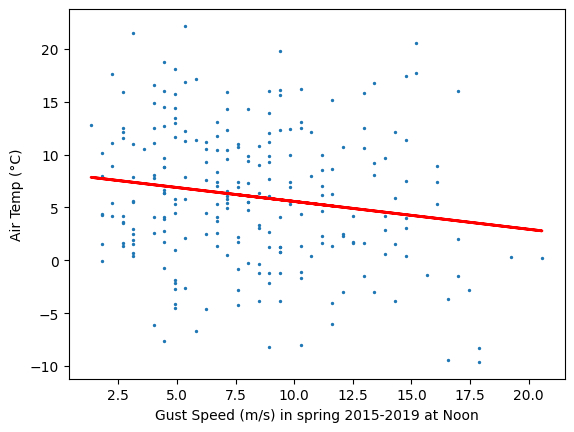

In [54]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

gSpeed15_19 = df15_19_noon['Gust Speed (m/s)']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
gSpeed15_19 = gSpeed15_19.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(gSpeed15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


plt.scatter(gSpeed15_19,temp15_19_noon, s=2)
plt.plot(gSpeed15_19, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")

-0.010373998769027448
37.293219708546665


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18')])

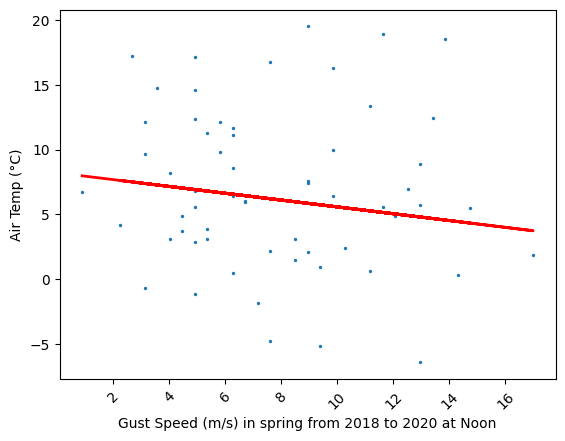

In [55]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']

gSpeed2020_noon = df2020_noon['Gust Speed (m/s)']
temp2020_noon = df2020_noon['Air Temp (°C)']

gSpeed2020_noon = gSpeed2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(gSpeed2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(gSpeed2020_noon, temp2020_noon, s = 2)
plt.plot(gSpeed2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Gust Speed (m/s) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)

### Case 4 : Barometric Pressure (mbar) and Gust Speed (m/s)

In [56]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

gSpeed_BP_15_19 = df15_19_noon[['Gust Speed (m/s)','Barometric Pressure (mbar)']]
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
gSpeed_BP_15_19 = gSpeed_BP_15_19.to_numpy().reshape(-1,2)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(gSpeed_BP_15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(gSpeed_BP_15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.04323073904294161
40.2035811318758


In [57]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']

gSpeed_BP_2020_noon = df2020_noon[['Gust Speed (m/s)','Barometric Pressure (mbar)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

gSpeed_BP_2020_noon = gSpeed_BP_2020_noon.to_numpy().reshape(-1,2)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(gSpeed_BP_2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.06306568306136584
34.582538126119374


### Case 5: Barometric Pressure (mbar), Gust Speed (m/s), Wind Speed (m/s)

In [58]:
# plot linear regression

df15_17_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

pre15_17 = df15_17_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp15_17_noon = df15_17_noon['Air Temp (°C)']

# convert to 2-D array
pre15_17 = pre15_17.to_numpy().reshape(-1,3)
temp15_17_noon = temp15_17_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(pre15_17,temp15_17_noon)
temp15_19_noon_pred = model.predict(pre15_17)


MSE= mean_squared_error(temp15_17_noon, temp15_19_noon_pred)
R2= r2_score(temp15_17_noon, temp15_19_noon_pred)

print (R2)
print (MSE)

0.05223258369520822
39.82532233262056


In [59]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']
pre2020_noon = df2020_noon[['Barometric Pressure (mbar)','Gust Speed (m/s)','Wind Speed (m/s)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

# date2020_noon = pre2020_noon.astype(str)
# date2020_noon = date2020_noon.str.split("-").str[-1].astype(int)
pre2020_noon = pre2020_noon.to_numpy().reshape(-1,3)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)
temp2020_noon_pred = model.predict(pre2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.024951148875497875
35.98935748134253


In [60]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

WSpeed_BP_15_19 = df15_19_noon[['Wind Speed (m/s)','Barometric Pressure (mbar)']]
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
wSpeed_BP_15_19 = WSpeed_BP_15_19.to_numpy().reshape(-1,2)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(WSpeed_BP_15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(WSpeed_BP_15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


0.05125051497479505
39.866589000655765


In [61]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']

wSpeed_BP_2020_noon = df2020_noon[['Wind Speed (m/s)','Barometric Pressure (mbar)']]
temp2020_noon = df2020_noon['Air Temp (°C)']

wSpeed_BP_2020_noon = wSpeed_BP_2020_noon.to_numpy().reshape(-1,2)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(wSpeed_BP_2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)

0.0388207777360392
35.477425150341986


/Users/kegind/miniconda3/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Drew Point


0.5745973024601975
17.875482169182977


Text(0, 0.5, 'Air Temp (°C)')

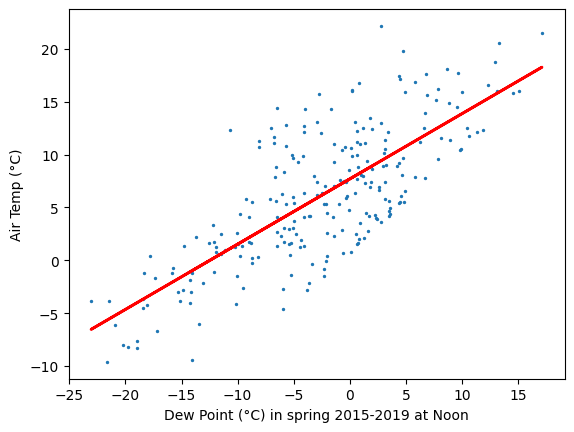

In [62]:
# plot linear regression
#df2015_2017 = pd.concat([df2015,df2016,df2017])
df15_19_noon = new_df_2015_2019[new_df_2015_2019["Time"]== '12:00:00']

dPoint15_19 = df15_19_noon['Dew Point (°C)']
temp15_19_noon = df15_19_noon['Air Temp (°C)']

# convert to 2-D array
dPoint15_19 = dPoint15_19.to_numpy().reshape(-1,1)
temp15_19_noon = temp15_19_noon.to_numpy().reshape(-1,1)

#make the model
model = LinearRegression()
model.fit(dPoint15_19,temp15_19_noon)
temp15_19_noon_pred = model.predict(dPoint15_19)


MSE= mean_squared_error(temp15_19_noon, temp15_19_noon_pred)
R2= r2_score(temp15_19_noon, temp15_19_noon_pred)

print (R2)
print (MSE)


plt.scatter(dPoint15_19,temp15_19_noon, s=2)
plt.plot(dPoint15_19, temp15_19_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring 2015-2019 at Noon")
plt.ylabel("Air Temp (°C)")

0.7144638591327863
10.539228096788941


(array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 [Text(-25.0, 0, '−25'),
  Text(-20.0, 0, '−20'),
  Text(-15.0, 0, '−15'),
  Text(-10.0, 0, '−10'),
  Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20')])

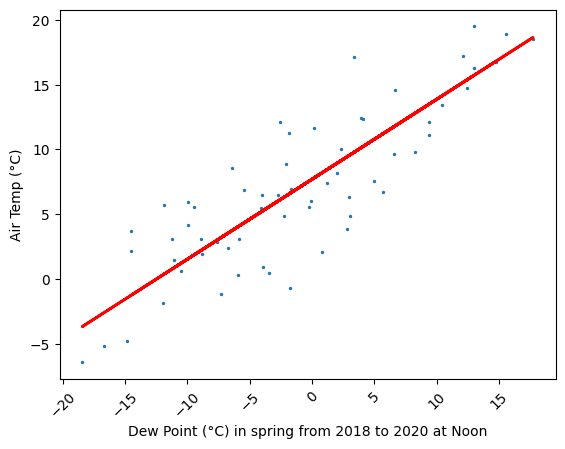

In [63]:
df2020_noon = df2019[df2019["Time"]== '12:00:00']

dPoint2020_noon = df2020_noon['Dew Point (°C)']
temp2020_noon = df2020_noon['Air Temp (°C)']

dPoint2020_noon = dPoint2020_noon.to_numpy().reshape(-1,1)
temp2020_noon = temp2020_noon.to_numpy().reshape(-1,1)

temp2020_noon_pred = model.predict(dPoint2020_noon)

MSE= mean_squared_error(temp2020_noon, temp2020_noon_pred)
R2= r2_score(temp2020_noon, temp2020_noon_pred)

print (R2)
print (MSE)
#draw scatter plot
plt.scatter(dPoint2020_noon, temp2020_noon, s = 2)
plt.plot(dPoint2020_noon, temp2020_noon_pred, color='red', linewidth=2)
plt.xlabel("Dew Point (°C) in spring from 2018 to 2020 at Noon")
plt.ylabel("Air Temp (°C)")
plt.xticks(rotation=45)